### Add fine-grained labels to main immune UMAP - July 2021

In [30]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import sys
import warnings
import anndata
warnings.filterwarnings('ignore')


def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = './figures/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.7.5
scanpy      1.7.0
sinfo       0.3.1
-----
PIL                 8.1.0
anndata             0.7.5
anndata2ri          1.0.6
backcall            0.2.0
cairo               1.20.0
cffi                1.14.4
constants           NA
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.2
get_version         2.1
h5py                3.1.0
highs_wrapper       NA
igraph              0.8.3
ipykernel           5.4.3
ipython_genutils    0.2.0
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.0
kiwisolver          1.3.1
legacy_api_wrap     1.2
leidenalg           0.8.3
llvmlite            0.35.0
markupsafe          1.1.1
matplotlib          3.3.4
mpl_toolkits        NA
natsort             7.1.1
numba               0.52.0
numexpr             2.7.2
numpy               1.21.2
packaging           20.9
pandas              1.2.1
parso               0.8.1
pexpect             4.8.0
pickleshare         0.7.5
pkg_res

'/opt/conda/envs/atac_env/bin/python'

In [31]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [32]:
import rpy2.rinterface_lib.callbacks
import logging

In [33]:
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

In [34]:
import anndata2ri
anndata2ri.activate()

In [24]:
%load_ext rpy2.ipython

In [7]:
%%R

library(Matrix)
library(Seurat)
library(dplyr)
library(data.table)
library(GenomicRanges)

#### Load data

In [35]:
path_to_gonads = '/nfs/team292/vl6/immune_fetal_gonads/'

In [83]:
adata = sc.read(path_to_gonads + 'scVI_integrated.h5ad')
adata.shape

(20556, 2000)

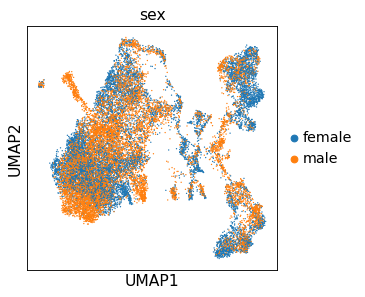

In [84]:
sc.pl.umap(adata, color = 'sex')

running Leiden clustering
    finished: found 22 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:04)


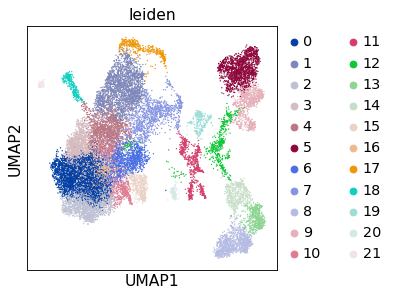

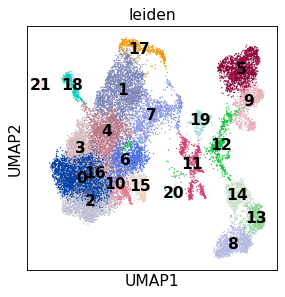

In [87]:
sc.tl.leiden(adata, resolution= 1) # high resolution 

sc.pl.umap(adata, color='leiden')
sc.pl.umap(adata, color='leiden', legend_loc='on data',save='_clustering_clusnumbers.pdf')


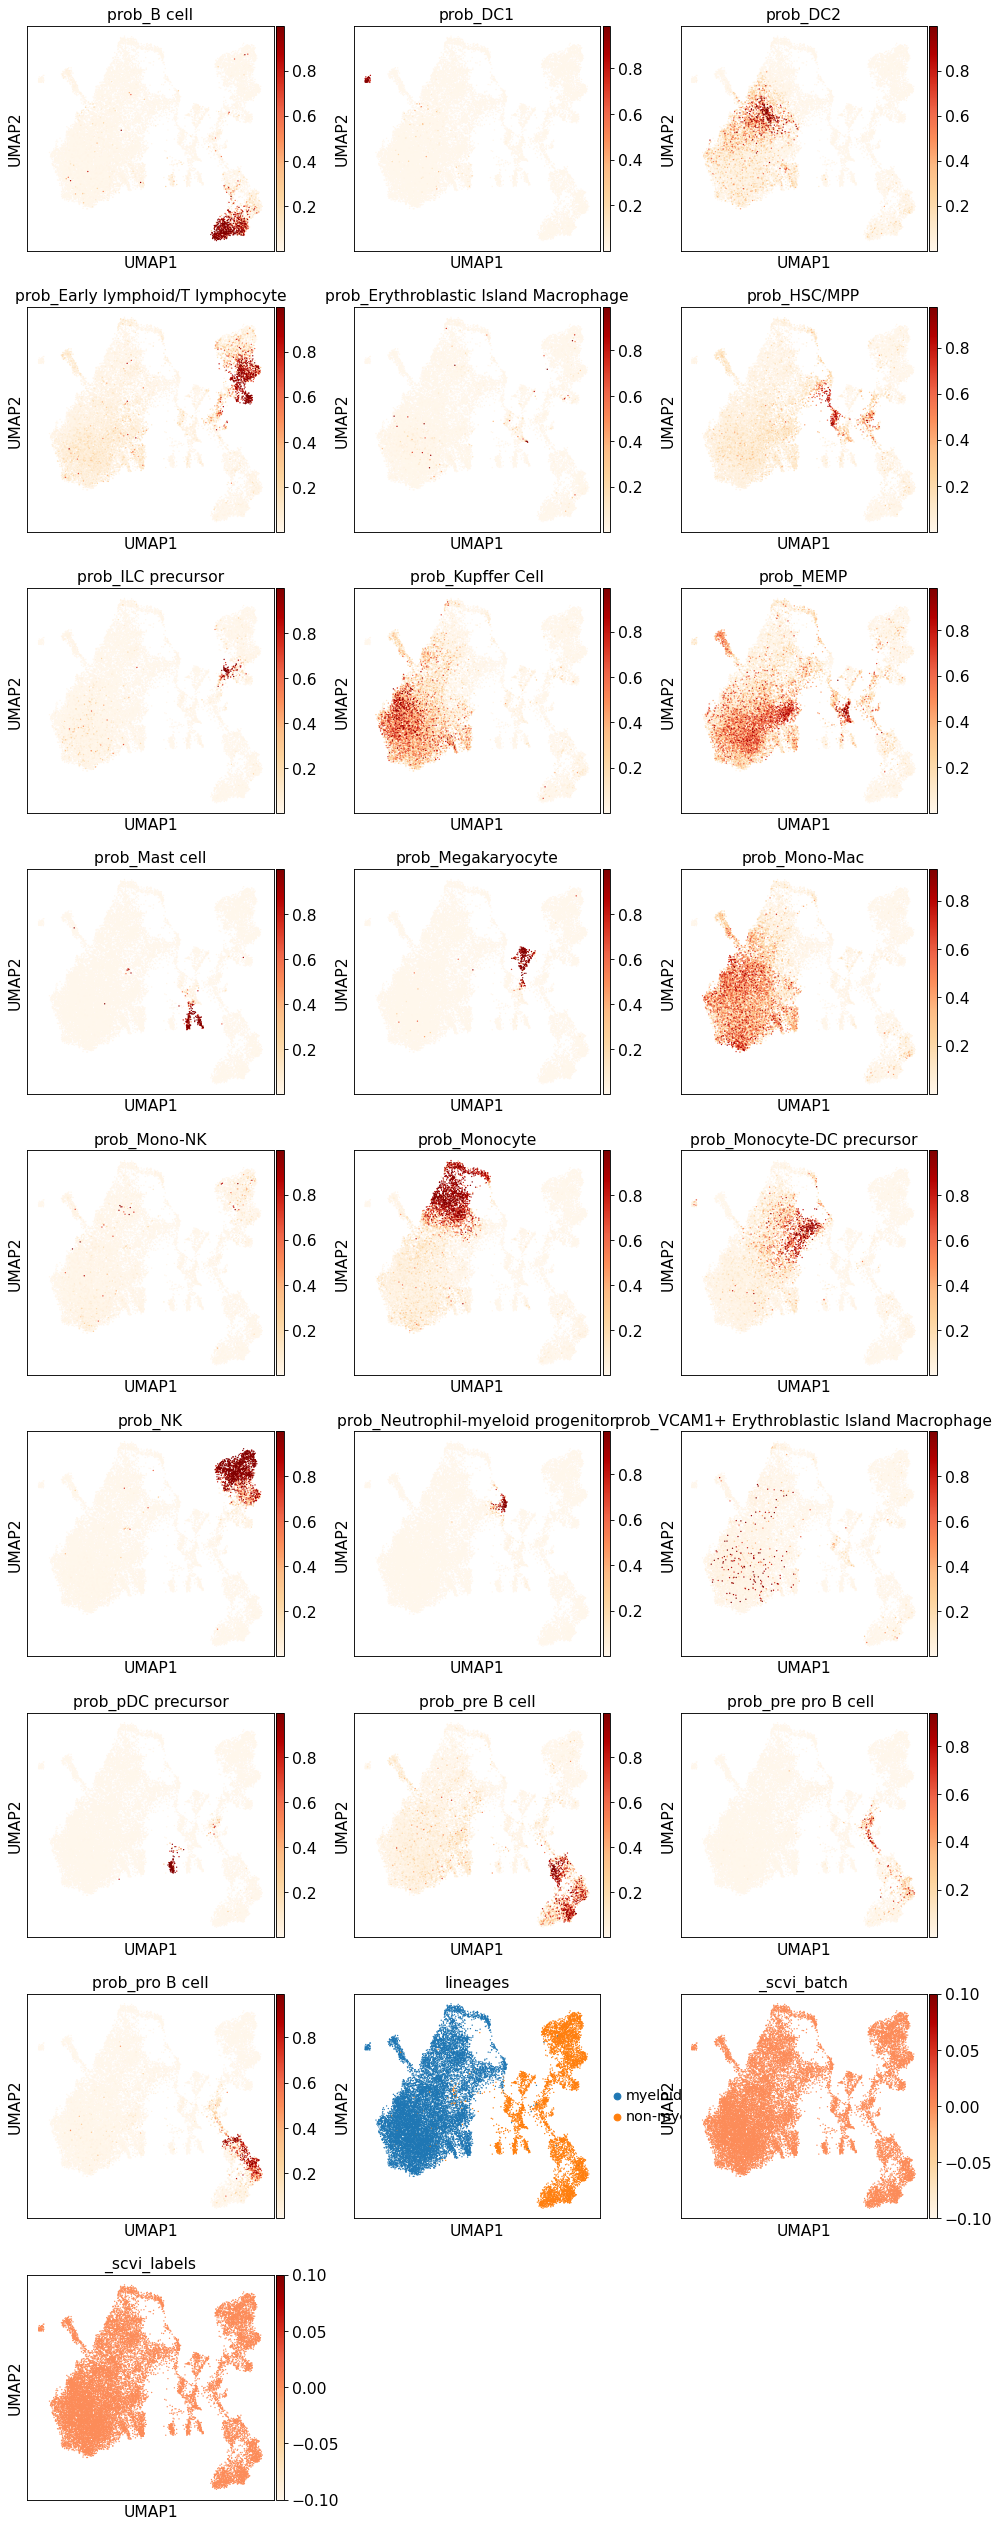

In [88]:
sc.pl.umap(adata, color = ['prob_B cell', 'prob_DC1', 'prob_DC2', 'prob_Early lymphoid/T lymphocyte', 'prob_Erythroblastic Island Macrophage', 'prob_HSC/MPP', 'prob_ILC precursor', 'prob_Kupffer Cell', 'prob_MEMP', 'prob_Mast cell', 'prob_Megakaryocyte', 'prob_Mono-Mac', 'prob_Mono-NK', 'prob_Monocyte', 'prob_Monocyte-DC precursor', 'prob_NK', 'prob_Neutrophil-myeloid progenitor', 'prob_VCAM1+ Erythroblastic Island Macrophage', 'prob_pDC precursor', 'prob_pre B cell', 'prob_pre pro B cell ', 'prob_pro B cell', 'lineages', '_scvi_batch', '_scvi_labels'],
          ncols = 3, color_map = 'OrRd')

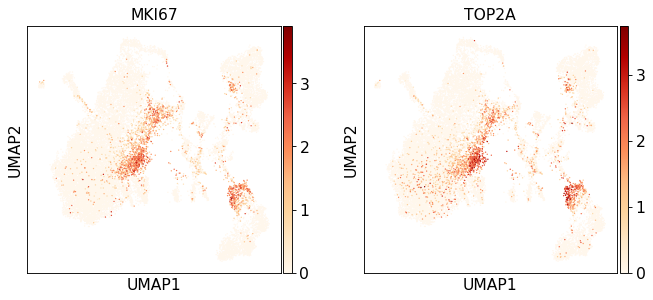

In [89]:
sc.pl.umap(adata, color = ['MKI67', 'TOP2A'], color_map = 'OrRd')

#### Visualize 

... storing 'leiden_R' as categorical


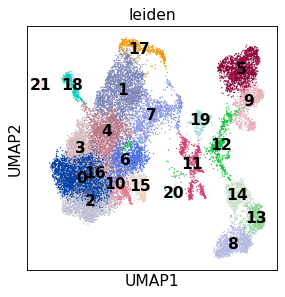

In [119]:
sc.pl.umap(adata, color = 'leiden', legend_loc = 'on data',
          save = '_clustering_clusnumbers.pdf')

running Leiden clustering
    finished: found 29 clusters and added
    'leiden_R', the cluster labels (adata.obs, categorical) (0:00:00)


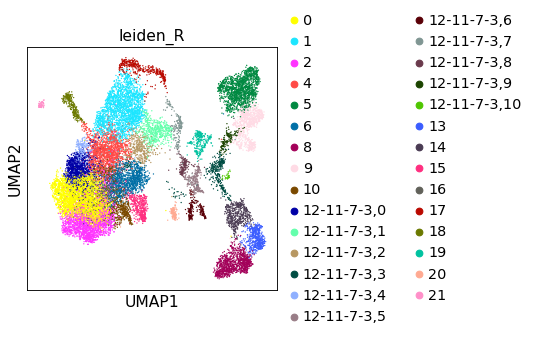

In [131]:
sc.tl.leiden(adata, resolution = 0.7, restrict_to = ('leiden', ['12', '11', '7', '3']))
sc.pl.umap(adata, color = 'leiden_R')

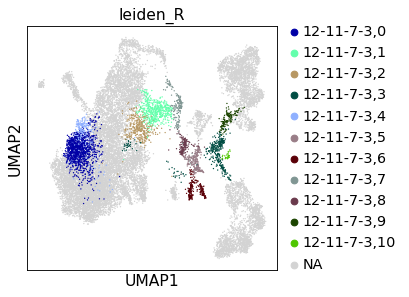

In [133]:
sc.pl.umap(adata, color = 'leiden_R', groups = ['12-11-7-3,0', '12-11-7-3,1', '12-11-7-3,2', '12-11-7-3,3', '12-11-7-3,4', '12-11-7-3,5', '12-11-7-3,6', 
                                               '12-11-7-3,7', '12-11-7-3,8', '12-11-7-3,9', '12-11-7-3,10'])

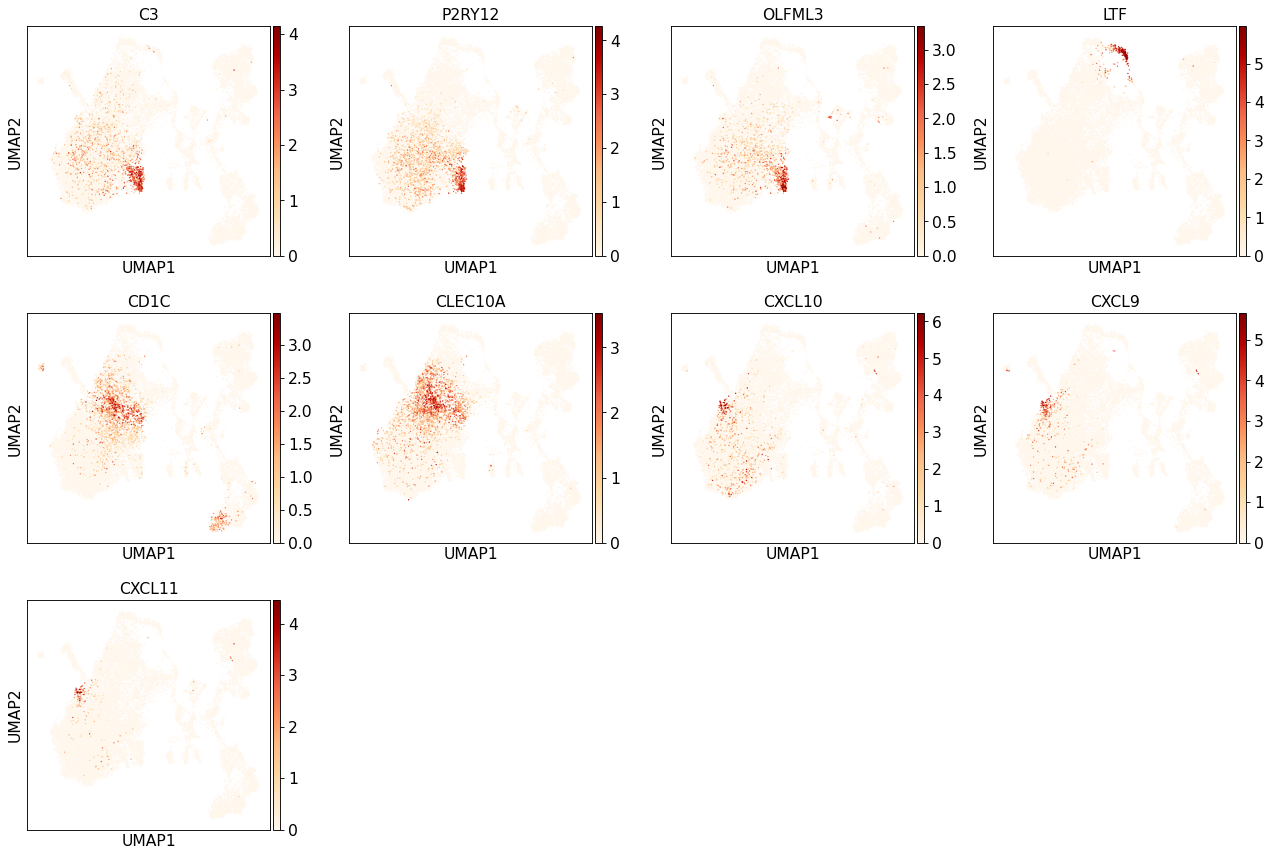

In [122]:
sc.pl.umap(adata, color = ['C3', 'P2RY12', 'OLFML3', 'LTF', 'CD1C', 'CLEC10A', 'CXCL10', 'CXCL9', 'CXCL11'], color_map = 'OrRd')

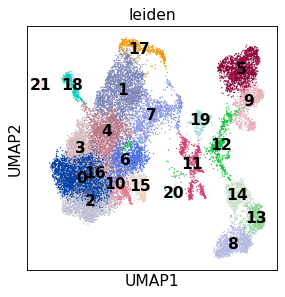

In [134]:
sc.pl.umap(adata, color = ['leiden'], legend_loc = 'on data')

... storing 'cell_type' as categorical


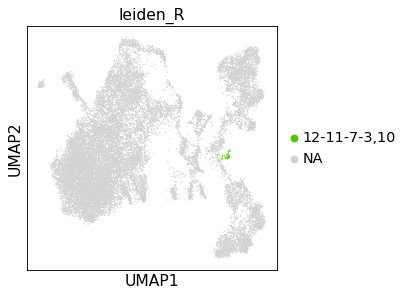

In [148]:
sc.pl.umap(adata, color = ['leiden_R'], groups = ['12-11-7-3,10'])

#### Manual annotations

In [78]:
# Assign cell type to leiden cluster based on gene expression and label transfer
# from human fetal liver hematopoiesis 
clusters = {'0' : 'tissue_repair mac', '2' : 'tissue_repair mac', 
           '16' : 'tissue_repair mac', '10' : 'tissue_repair mac', '6' : 'tissue_repair mac', 
           '12-11-7-3,0' : 'tissue_repair mac', '4' : 'cDC2', '12-11-7-3,1' : 'mono_DC prec','12-11-7-3,2' : 'mono_DC prec',
            '15' : 'TREM2_ftM',
           '18' : 'SIGLEC15_ftM', '12-11-7-3,4' : 'tissue_repair mac', '21' : 'cDC1',
           '1' : 'mono', 
            '13-18-19,0' : 'mono_DC prec', '9' : 'early T', '12-11-7-3,10' : 'pre_pro_B',
            '12-11-7-3,3' : 'pre_pro_B', '12-11-7-3,8' : 'myeloid prog', '12-11-7-3,5' : 'MEMP', 
            '17' : 'neutro',  '13-18-19,4' : 'mono-DC prec',
       '12-11-7-3,9' : 'ILC prec', '12-11-7-3,7' : 'NMP', 
            '5' : 'NK',
          '20' : 'pDC prec', '19' : 'mega', '12-11-7-3,6' : 'mast',
            '14' : 'pro_B', '13' : 'pre_B',  '8' : 'B cell'}
adata.obs['cell_type'] = adata.obs['leiden_R'].map(clusters)
adata.obs['cell_type'].value_counts(dropna = False)                  

tissue_repair mac    8799
mono                 2186
cDC2                 1469
NK                   1445
B cell               1015
mono_DC prec          888
early T               814
pre_B                 516
pro_B                 490
TREM2_ftM             475
neutro                401
pre_pro_B             386
SIGLEC15_ftM          266
mega                  258
MEMP                  244
mast                  223
NMP                   189
myeloid prog          158
ILC prec              144
pDC prec              126
cDC1                   64
Name: cell_type, dtype: int64

... storing 'cell_type' as categorical


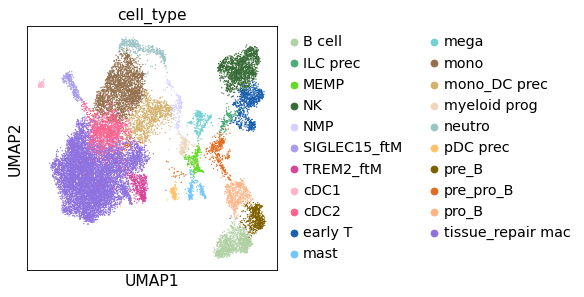

In [79]:
sc.pl.umap(adata, color = 'cell_type')

In [80]:
# Order categories 
adata.obs['cell_type'] = adata.obs['cell_type'].cat.reorder_categories(['pre_pro_B', 'pro_B',
      'pre_B', 'B cell', 'pDC prec', 'myeloid prog', 'MEMP', 'mega', 'mast',
       'ILC prec', 'early T', 'NK', 'NMP', 'mono_DC prec', 'neutro',
       'mono', 'cDC2', 'cDC1', 
       'tissue_repair mac',  
        'SIGLEC15_ftM', 'TREM2_ftM'])

In [81]:
gonads_colors = ['#b0d1a3','#4bab79','#64da25', '#366b36',   # B cells
                               '#d8d1ff', # pDC
                            '#a89ced', '#d9439a', '#ffb5ca', '#ff6390',   # mega/mast
                             '#195fb0', '#71c6fc', '#6fd1d3',   # T/NK
                            '#94714e', '#d4b16c', '#efd6bb',  '#9bc4c4', # myeloid
                             '#ffc266', '#7f6000', '#e36a1e',   '#8f72e0', '#b4b90e',
                             ]

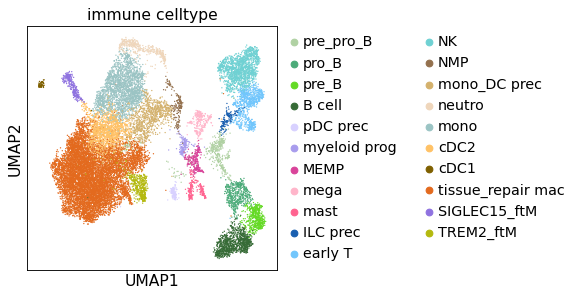

In [82]:
sc.pl.umap(adata, color = 'cell_type', 
           title = 'immune celltype', palette = gonads_colors, save = '_clean_clusters.pdf')

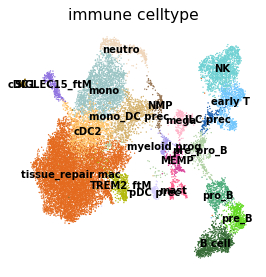

In [83]:
sc.pl.umap(adata, color = 'cell_type', palette = gonads_colors, title = 'immune celltype',
          legend_loc = 'on data', legend_fontweight = 'bold', 
           legend_fontsize = 9, save = '_clusters_ondata.pdf',
          frameon = False)

#### Immune dotplot

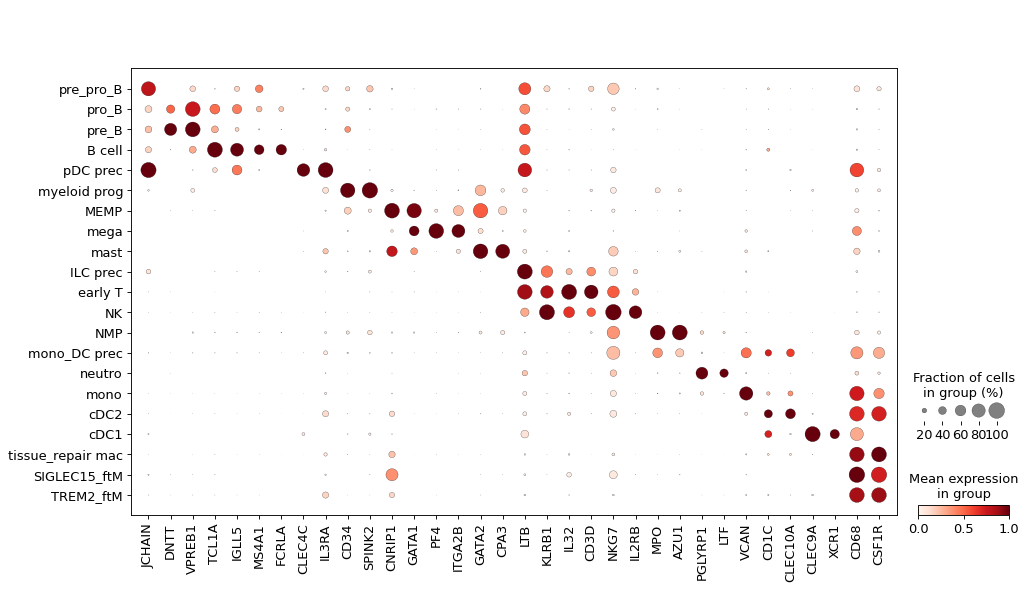

In [84]:
sc.pl.dotplot(adata, var_names = ['JCHAIN',
                                   'DNTT', 'VPREB1', 'TCL1A', 'IGLL5',
                                  'MS4A1', 'FCRLA', 
                                  'CLEC4C', 'IL3RA', 'CD34', 'SPINK2', 
    'CNRIP1', 'GATA1', 'PF4', 'ITGA2B', 'GATA2', 'CPA3',
                                  'LTB', 'KLRB1', 'IL32', 'CD3D',  'NKG7', 'IL2RB',
                                  'MPO', 'AZU1', 'PGLYRP1', 'LTF', 'VCAN', 'CD1C', 'CLEC10A', 'CLEC9A', 'XCR1', 
                                      'CD68', 'CSF1R', 
                                  ], 
              groupby = 'cell_type',swap_axes = False, standard_scale = 'var', save = '_all_markers.pdf')

#### Immune cell type predictions

In [85]:
plotting_adata_obs = adata.obs
plotting_adata_obs.columns

Index(['batch', 'batch_collection', 'cryopreserved', 'individual', 'location',
       'n_counts', 'n_genes', 'percent_mito', 'process', 'sample', 'sex',
       'stage', 'study', 'PCW', 'sample_source', 'doublet_score',
       'doublet_score_0.75', 'scrublet_score', 'scrublet_cluster_score',
       'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'leiden', 'enrichment',
       'donor', 'TP', '10xKit', 'dig_protocol', 'low_ncounts', 'high_mito',
       'low_ncounts_high_mito', 'S_score', 'G2M_score', 'phase', 'lineages_v1',
       'celltype_v1', 'lineage_v2', 'somatic_celltype_v2', 'trimester',
       'lineage', 'liver_classifier', 'prob_B cell', 'prob_DC1', 'prob_DC2',
       'prob_Early lymphoid/T lymphocyte',
       'prob_Erythroblastic Island Macrophage', 'prob_HSC/MPP',
       'prob_ILC precursor', 'prob_Kupffer Cell', 'prob_MEMP',
       'prob_Mast cell', 'prob_Megakaryocyte', 'prob_Mono-Mac', 'prob_Mono-NK',
       'prob_Monocyte', 'prob_Monocyte-DC precursor', 'prob_NK',
       'p

In [86]:
# Rename probabilities to match my assigned cell_type 
plotting_adata_obs = plotting_adata_obs.rename(columns={'prob_B cell': 'prob_B cell', 
                'prob_Early lymphoid/T lymphocyte': 'prob_early-T', 'prob_HSC/MPP' : 'prob_HSC', 
                'prob_ILC precursor' : 'prob_ILC-prec', 
                'prob_MEMP' : 'prob_MEMP', 'prob_Mast cell' : 'prob_mast', 
                'prob_Megakaryocyte' : 'prob_mega', 'prob_NK' : 'prob_NK', 
            'prob_pDC precursor' : 'prob_pDC-prec', 'prob_pre B cell': 'prob_pre-B', 
                'prob_pre pro B cell ' : 'prob_pre-pro-B', 'prob_pro B cell' : 'prob_pro-B',
                                                       'prob_DC1': 'prob_cDC1', 
                 'prob_DC2' : 'prob_cDC2', 'prob_Kupffer Cell' : 'prob_Kupffer', 
                'prob_Mono-Mac' : 'prob_mono-mac', 
       'prob_Monocyte' : 'prob_mono', 'prob_Monocyte-DC precursor' : 'prob_mono-cDC-prec',
       'prob_Neutrophil-myeloid progenitor' : 'prob_NMP'})

In [87]:
plotting_adata_obs.columns

Index(['batch', 'batch_collection', 'cryopreserved', 'individual', 'location',
       'n_counts', 'n_genes', 'percent_mito', 'process', 'sample', 'sex',
       'stage', 'study', 'PCW', 'sample_source', 'doublet_score',
       'doublet_score_0.75', 'scrublet_score', 'scrublet_cluster_score',
       'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'leiden', 'enrichment',
       'donor', 'TP', '10xKit', 'dig_protocol', 'low_ncounts', 'high_mito',
       'low_ncounts_high_mito', 'S_score', 'G2M_score', 'phase', 'lineages_v1',
       'celltype_v1', 'lineage_v2', 'somatic_celltype_v2', 'trimester',
       'lineage', 'liver_classifier', 'prob_B cell', 'prob_cDC1', 'prob_cDC2',
       'prob_early-T', 'prob_Erythroblastic Island Macrophage', 'prob_HSC',
       'prob_ILC-prec', 'prob_Kupffer', 'prob_MEMP', 'prob_mast', 'prob_mega',
       'prob_mono-mac', 'prob_Mono-NK', 'prob_mono', 'prob_mono-cDC-prec',
       'prob_NK', 'prob_NMP', 'prob_VCAM1+ Erythroblastic Island Macrophage',
       'prob_p

In [88]:
# Create new anndata to exploit scanpy functions for plotting 
plotting_matrix = plotting_adata_obs[['prob_pre-pro-B',  
        'prob_pro-B', 'prob_pre-B', 'prob_B cell', 
           'prob_pDC-prec', 'prob_HSC', 'prob_MEMP', 'prob_mega', 'prob_mast','prob_ILC-prec',
            'prob_early-T', 'prob_NK',
        'prob_NMP', 'prob_mono-cDC-prec',  'prob_mono',
           'prob_cDC2', 'prob_cDC1',
           'prob_mono-mac', 'prob_Kupffer'
        ]].values
plotting_matrix.shape

(20556, 19)

In [89]:
plotting_obs = adata.obs[['leiden', 'cell_type']]
plotting_obs.shape

(20556, 2)

In [90]:
plotting_probs = ['prob_pre-pro-B',  
        'prob_pro-B', 'prob_pre-B', 'prob_B cell', 
           'prob_pDC-prec', 'prob_HSC', 'prob_MEMP', 'prob_mega', 'prob_mast','prob_ILC-prec',
            'prob_early-T', 'prob_NK',
        'prob_NMP', 'prob_mono-cDC-prec',  'prob_mono',
           'prob_cDC2', 'prob_cDC1',
           'prob_mono-mac', 'prob_Kupffer'
        ]

In [91]:
len(plotting_probs)

19

In [92]:
plotting_var_dict = {'probs' : plotting_probs, 'random_string' : [str(i) for i in range(19)]}
plotting_var = pd.DataFrame(plotting_var_dict)
plotting_var = plotting_var.set_index('probs')
plotting_var.head()
plotting_var.shape

(19, 1)

In [93]:
plotting_adata = anndata.AnnData(X = plotting_matrix, obs = plotting_obs, var = plotting_var)
plotting_adata

AnnData object with n_obs × n_vars = 20556 × 19
    obs: 'leiden', 'cell_type'
    var: 'random_string'

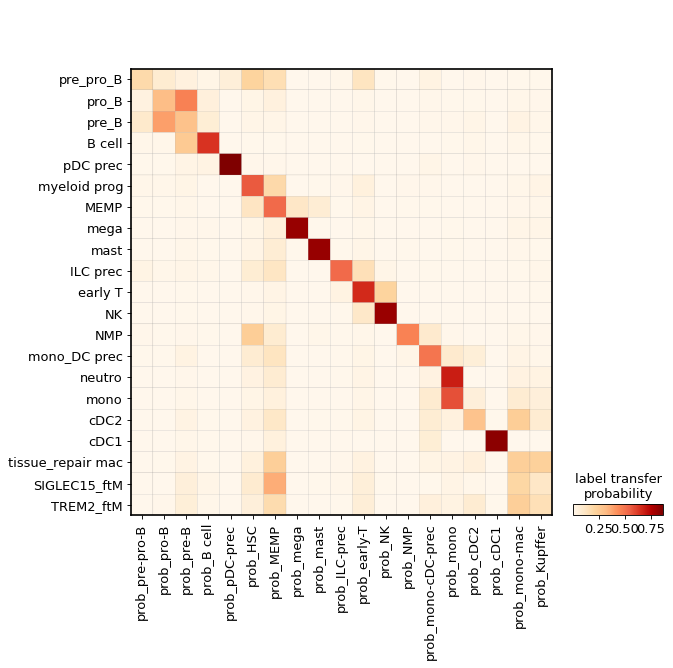

In [94]:
sc.pl.matrixplot(plotting_adata, var_names = plotting_probs, groupby = 'cell_type', cmap = 'OrRd',
                  save = '_matrixplot.pdf', colorbar_title = "label transfer\nprobability",)

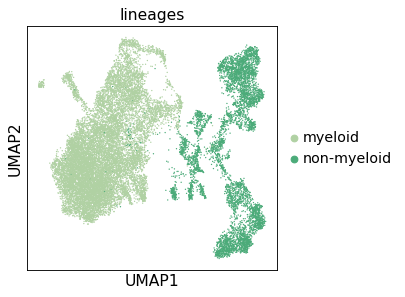

In [95]:
sc.pl.umap(adata, color = 'lineages', palette = gonads_colors)

#### Save

In [145]:
adata.write(path_to_gonads + 'immune_merged_lineages_annotated_scVI.h5ad')

In [146]:
adata.obs['enrichment'].value_counts()

enriched        16716
non-enriched     3840
Name: enrichment, dtype: int64

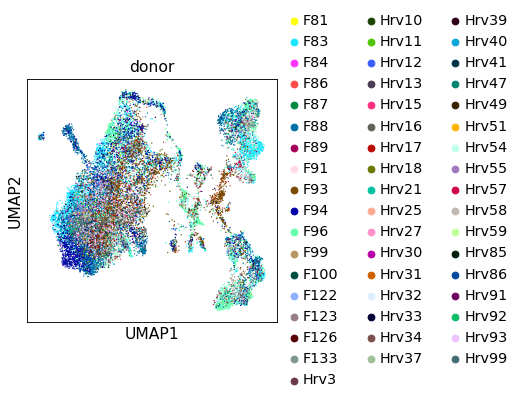

In [178]:
sc.pl.umap(adata, color = 'donor', save = '_individual')

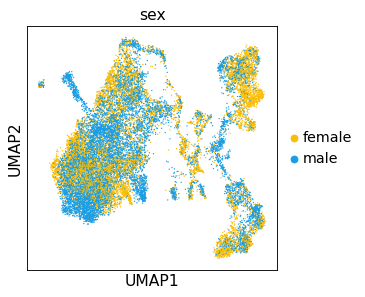

In [137]:
sc.pl.umap(adata, color = 'sex', save = '_sex', palette = ['#fbbc04','#199de5',])

In [118]:
np.unique(adata.obs['stage'])

array(['10.0', '11.0', '12.0', '13.0', '14.0', '15.0', '16.0', '17.0',
       '18.0', '19.0', '21.0', '6.0', '6.5', '7.0', '7.5', '8.0', '8.4',
       '8.6', '8.8', '9.0'], dtype=object)

In [119]:
adata.obs['stage_numeric'] = adata.obs['stage'].astype(float)

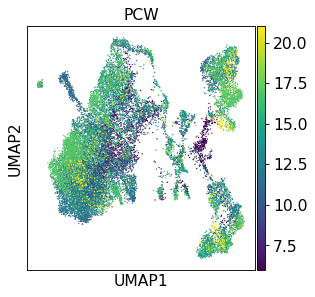

In [120]:
sc.pl.umap(adata, color = 'stage_numeric',
           title = 'PCW', color_map = 'viridis', save = '_stage')

In [124]:
adata.obs['trimester'] = np.where(adata.obs['stage_numeric'] > 12.0, 'second', 'first')

... storing 'trimester' as categorical


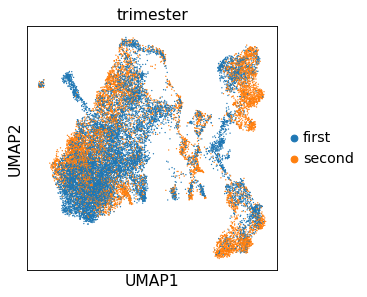

In [125]:
sc.pl.umap(adata, color = 'trimester',
            save = '_trimester')

#### TF-IDF markers

In [37]:
adata = sc.read(path_to_gonads + 'immune_merged_lineages_annotated_scVI.h5ad')

In [40]:
adata.obs['cell_type'].value_counts(normalize = True)

tissue_repair mac    0.428050
mono                 0.106344
cDC2                 0.071463
NK                   0.070296
B cell               0.049377
mono_DC prec         0.043199
early T              0.039599
pre_B                0.025102
pro_B                0.023837
TREM2_ftM            0.023108
neutro               0.019508
pre_pro_B            0.018778
SIGLEC15_ftM         0.012940
mega                 0.012551
MEMP                 0.011870
mast                 0.010848
NMP                  0.009194
myeloid prog         0.007686
ILC prec             0.007005
pDC prec             0.006130
cDC1                 0.003113
Name: cell_type, dtype: float64

In [29]:
adata[[i in ['tissue_repair mac', 'SIGLEC15_ftM', 'TREM2_ftM'] for i in adata.obs.cell_type]].obs.cell_type.value_counts(normalize = True)

tissue_repair mac    0.922327
TREM2_ftM            0.049790
SIGLEC15_ftM         0.027883
Name: cell_type, dtype: float64

In [33]:
import anndata
adata = anndata.AnnData(X = adata.raw.X, var = adata.raw.var, obs = adata.obs)

In [34]:
%%R -i adata
adata

class: SingleCellExperiment 
dim: 28497 19538 
metadata(0):
assays(1): X
rownames(28497): A1BG A1BG-AS1 ... ZYX ZZEF1
rowData names(194): gene_ids.0.0 feature_types.0.0 ...
  feature_types.52.1 n_cells.52.1
colnames(19538): FCA_GND8047884_CCCATACAGAGATGAG
  FCA_GND8047884_CTTAGGATCAGTGCAT ... HD_F_GON9883868_TTCCCAGGTATCACCA
  HD_F_GON9883868_TTCGGTCTCCAGAGGA
colData names(59): batch batch_collection ... main_lineages
  dpt_pseudotime
reducedDimNames(0):
altExpNames(0):


In [35]:
%%R -o mrks

library(SoupX)
counts <- assay(adata, "X")
colnames(counts) <- colnames(adata)
rownames(counts) <- rownames(adata)
mrks = quickMarkers(counts, colData(adata)$clusters, N = 100) # where clusters is the cell type assignment and 20 means I want the top 20 genes per cluster that pass the hypergeometric test

In [36]:
mrks

gene        cluster  geneFrequency  geneFrequencyOutsideCluster  \
1     SMIM24        HSC/MPP       0.756646                     0.038007   
2     SPINK2        HSC/MPP       0.470348                     0.011497   
3     PRSS57        HSC/MPP       0.638037                     0.053546   
4        TTN        HSC/MPP       0.472393                     0.017901   
5     JCHAIN        HSC/MPP       0.584867                     0.045987   
...      ...            ...            ...                          ...   
1896     ADK  SIGLEC15+ mac       0.644377                     0.133115   
1897   RAI14  SIGLEC15+ mac       0.267477                     0.004998   
1898  IGSF21  SIGLEC15+ mac       0.392097                     0.035556   
1899  MAGEF1  SIGLEC15+ mac       0.626140                     0.128846   
1900   KIFC3  SIGLEC15+ mac       0.310030                     0.013223   

      geneFrequencySecondBest  geneFrequencyGlobal secondBestClusterName  \
1                    0.649635             0.055993                  MEMP   
2                    0.178832             0.022981                  MEMP   
3                    0.952555             0.068175                  MEMP   
4                    0.170616             0.029276                  mast   
5                    0.958333             0.059474              pDC prec   
...                       ...                  ...                   ...   
1896                 0.496350             0.141724                  MEMP   
1897                 0.023697             0.009418                  mast   
1898                 0.098592             0.041560       ifn-induced mac   
1899                 0.345962             0.137220                  cDC2   
1900                 0.230088             0.018221                  mega   

         tfidf       idf           qval  
1     2.181048  2.882521   0.000000e+00  
2     1.774666  3.773094  3.237162e-260  
3     1.713563  2.685680  2.067750e-243  
4     1.668008  3.530978  1.096462e-230  
5     1.650623  2.822219  1.106046e-224  
...        ...       ...            ...  
1896  1.259032  1.953875   7.122250e-97  
1897  1.247830  4.665181  2.947322e-106  
1898  1.247111  3.180616   7.555585e-90  
1899  1.243621  1.986171   2.601494e-93  
1900  1.241729  4.005186   8.693043e-97  

[1900 rows x 10 columns]

In [37]:
mrks.to_csv("/home/jovyan/Immune_markersTFIDF.csv")

In [96]:
scmap = pd.read_csv(path_to_gonads + 'scmap_from_Bian.csv', index_col = 0)
scmap.shape

(20556, 2)

In [97]:
scmap = scmap.rename({'scmap_labels' : 'projection by scmap'}, axis = 1)

In [98]:
for col in scmap: 
    mapping = scmap[col].to_dict()
    adata.obs[col] = adata.obs_names.map(mapping)

In [99]:
cols = ['firebrick']

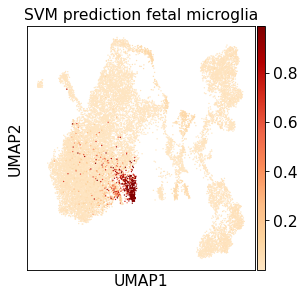

In [21]:
sc.pl.umap(adata, color = 'prob_Mac_4', color_map = newcmp,
           title = "SVM prediction fetal microglia",  frameon = True, save = '_scmap_immune_microglia.pdf')

#### Fetal bone marrow osteoclasts projections

In [76]:
svm_osteo = pd.read_csv(path_to_gonads + '_SVM_predictions_FetalBoneMarrow.csv', index_col = 0)
svm_osteo.shape

(20556, 61)

In [77]:
for col in svm_osteo: 
    mapping = svm_osteo[col].to_dict()
    adata.obs[col] = adata.obs_names.map(mapping)

... storing 'FetalBoneMarrow' as categorical


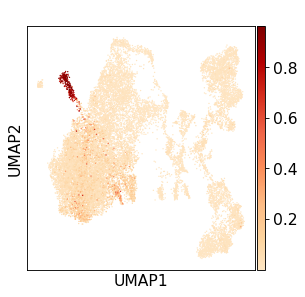

In [78]:
sc.pl.umap(adata, color = 'prob_osteoclast', color_map = newcmp,
           title = " ",  frameon = True, save = '_svm_immune_osteoclasts.pdf')

In [84]:
scmap_osteo = pd.read_csv(path_to_gonads + 'scmap_from_FetalBoneMarrow.csv', index_col = 0)
scmap_osteo.shape

(20556, 2)

In [85]:
for col in scmap_osteo: 
    mapping = scmap_osteo[col].to_dict()
    adata.obs[col] = adata.obs_names.map(mapping)

... storing 'scmap_FetalBoneMarrow' as categorical


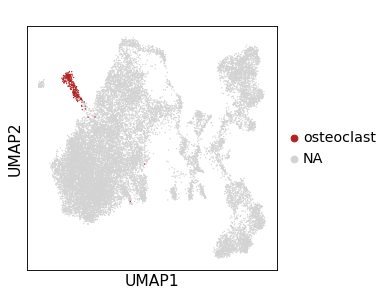

In [86]:
sc.pl.umap(adata, color = 'scmap_FetalBoneMarrow', groups = 'osteoclast', 
           title = " ", palette = cols, frameon = True, save = '_scmap_immune_osteoclast.pdf')

#### Subset to macrophages

In [97]:
macros = adata[[i in ['tissue_repair mac', 'TREM2_ftM', 'SIGLEC15_ftM'] for i in adata.obs['cell_type']]]
macros.shape

(9540, 2000)

In [38]:
macros.write(path_to_gonads + 'macrophages.h5ad')

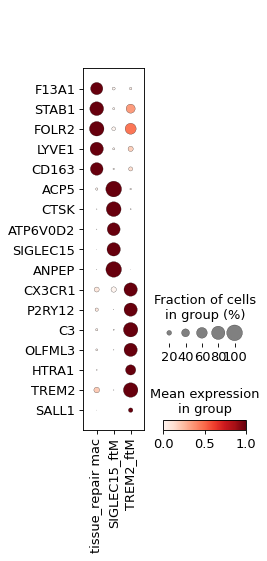

In [9]:
sc.pl.dotplot(adata[[i in ['tissue_repair mac', 'SIGLEC15_ftM', 'TREM2_ftM',] for i in adata.obs['cell_type']]],
              var_names = [ 'F13A1', 'STAB1', 'FOLR2', 'LYVE1', 'CD163', 
          'ACP5', 'CTSK', 'ATP6V0D2', 'SIGLEC15', 'ANPEP', 
                           'CX3CR1', 'P2RY12', 'C3', 'OLFML3', 'HTRA1', 'TREM2', 'SALL1'], 
              groupby = 'cell_type',  standard_scale = 'var', save = '_markers_vertical.pdf',
             swap_axes= True)

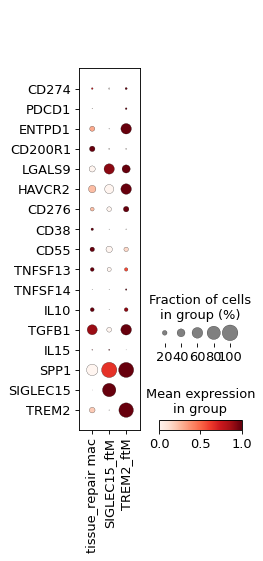

In [17]:
sc.pl.dotplot(adata[[i in ['tissue_repair mac', 'TREM2_ftM', 'SIGLEC15_ftM'] for i in adata.obs['cell_type']]],
              var_names = ['CD274', 'PDCD1', 'ENTPD1',  'CD200R1', 'LGALS9', 'HAVCR2', 'CD276', 'CD38', 'CD55', 'TNFSF13', 
                          'TNFSF14',  'IL10', 'TGFB1',  'IL15', 'SPP1', 'SIGLEC15','TREM2', 
                          ],
              groupby = 'cell_type',  standard_scale = 'var', save = '_immunoregulatory_vertical.pdf',
             swap_axes= True)

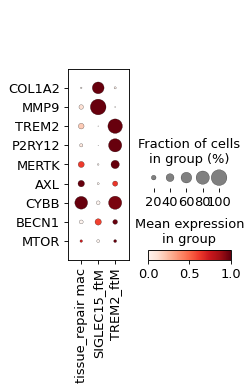

In [108]:
sc.pl.dotplot(adata[[i in ['tissue_repair mac', 'TREM2_ftM', 'SIGLEC15_ftM'] for i in adata.obs['cell_type']]],
              var_names = [  'COL1A2' ,'MMP9', 'TREM2', 'P2RY12', 'MERTK', 'AXL', 'CYBB', 'BECN1', 'MTOR',                        ],
              groupby = 'cell_type',  standard_scale = 'var', save = '_interactions.pdf',
             swap_axes= True)

Trying to set attribute `.uns` of view, copying.


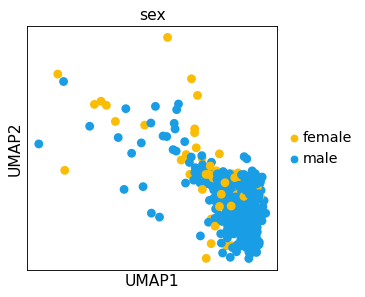

In [109]:
sc.pl.umap(adata[[i in ['TREM2_ftM'] for i in adata.obs['cell_type']]], 
          color = 'sex', palette =  [ '#fbbc04','#199de5', '#ff61fc'], save = '_trem2_sex')

Trying to set attribute `.uns` of view, copying.


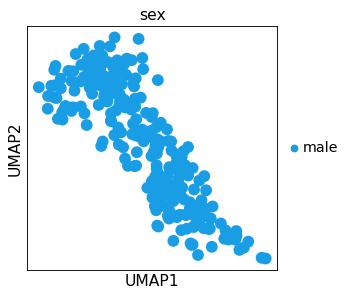

In [111]:
sc.pl.umap(adata[[i in ['SIGLEC15_ftM'] for i in adata.obs['cell_type']]], 
          color = 'sex', palette =  [ '#199de5',], save = '_siglec15_sex')

In [183]:
macros_metadata = macros.obs[['sex', 'cell_type']]

In [185]:
%%R 

library(ggplot2)
library(tidyverse)

In [188]:
%%R -i macros_metadata

sex_colors = c('#fbbc04','#199de5')
macros_metadata = macros_metadata %>%
  mutate(cell_type = fct_relevel(cell_type, 
            'tissue_repair mac', 'SIGLEC15_ftM', 'TREM2_ftM'))
    
ggplot(macros_metadata, aes(x=cell_type, fill = sex) ) + 
  scale_fill_manual(values = sex_colors) +
  #facet_wrap(~sex)+
  geom_bar(position = "fill")+
  theme_classic(15) + theme(axis.text.x = element_text(angle = 45, hjust=1)) +
    ylab('fraction of cells')+
    xlab('sex')
ggsave(filename = paste0('/home/jovyan/immune/figures/macrophages_sex.pdf'), dpi = 300, 
       width = 3.5, height = 6.5)

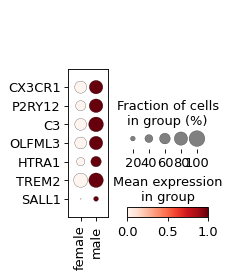

In [18]:
sc.pl.dotplot(adata[[i in ['TREM2_ftM'] for i in adata.obs['cell_type']]],
              var_names = [ 
          'CX3CR1', 'P2RY12', 'C3', 'OLFML3', 'HTRA1', 'TREM2', 'SALL1'], 
              groupby = 'sex',  standard_scale = 'var', save = '_microglia_sex_vertical.pdf',
             swap_axes= True)

In [178]:
immune_df = pd.crosstab(index = adata.obs['sample'], columns = adata.obs['cell_type'])

In [179]:
immune_df.columns = immune_df.columns.add_categories(['PCW'])
immune_df.columns = immune_df.columns.add_categories(['sex'])
immune_df.columns = immune_df.columns.add_categories(['total_cells'])


In [180]:
immune_df["total_cells"] = immune_df.sum(axis=1)
immune_df['PCW'] = immune_df.index.map(pd.Series(adata.obs['PCW'].values,index= adata.obs['sample']).to_dict())
immune_df['sex'] = immune_df.index.map(pd.Series(adata.obs['sex'].values,index= adata.obs['sample']).to_dict())

immune_df = immune_df.sort_values('PCW')
immune_df.head()

cell_type          pre_pro_B  pro_B  pre_B  B cell  pDC prec  myeloid prog  \
sample                                                                       
FCA_GND9332064             1      0      0       0         0             0   
FCA_GND9332065             1      0      0       0         0             0   
FCA_GND8622629           276     55     25      17        22            10   
HCA_F_GON10828902          3      0      0       0         0             1   
HCA_F_GON10828901          6      0      0       0         0             2   

cell_type          MEMP  mega  mast  ILC prec  ...  neutro  mono  cDC2  cDC1  \
sample                                         ...                             
FCA_GND9332064        0     0     1         0  ...       0     0     1     0   
FCA_GND9332065        0     0     1         0  ...       0     0     0     0   
FCA_GND8622629       30    11    48        64  ...      23   258   243     2   
HCA_F_GON10828902     2     8     3         1  ...       2    10     8     0   
HCA_F_GON10828901     1     8     1         0  ...       0     6    12     0   

cell_type          tissue_repair mac  SIGLEC15_ftM  TREM2_ftM  total_cells  \
sample                                                                       
FCA_GND9332064                     8             0          0           12   
FCA_GND9332065                    15             0          0           20   
FCA_GND8622629                   822             0         15         2237   
HCA_F_GON10828902                 95             0          0          144   
HCA_F_GON10828901                111             0          1          159   

cell_type          PCW     sex  
sample                          
FCA_GND9332064     6.0  female  
FCA_GND9332065     6.0  female  
FCA_GND8622629     6.0    male  
HCA_F_GON10828902  6.5  female  
HCA_F_GON10828901  6.5  female  

[5 rows x 24 columns]

In [182]:
#### Save as excel file with multiple sheets

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('/home/jovyan/Supplementary_Table8.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
immune_df.to_excel(writer, sheet_name='immune')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [161]:
adata_metadata = adata.obs[['cell_type', 'PCW', 'sex']]

In [167]:
%%R -i adata_metadata

sex_colors = c('#fbbc04','#199de5')
adata_metadata = adata_metadata %>%
  mutate(cell_type = fct_relevel(cell_type, 
            'pre_pro_B', 'pro_B',
      'pre_B', 'B cell', 'pDC prec', 'myeloid prog', 'MEMP', 'mega', 'mast',
       'ILC prec', 'early T', 'NK', 'NMP', 'mono_DC prec', 'neutro',
       'mono', 'cDC2', 'cDC1', 
       'tissue_repair mac',  
        'SIGLEC15_ftM', 'TREM2_ftM'))

celltype_colors = c('#b0d1a3','#4bab79','#64da25', '#366b36',   # B cells
                               '#d8d1ff', # pDC
                            '#a89ced', '#d9439a', '#ffb5ca', '#ff6390',   # mega/mast
                             '#195fb0', '#71c6fc', '#6fd1d3',   # T/NK
                            '#94714e', '#d4b16c', '#efd6bb',  '#9bc4c4', # myeloid
                             '#ffc266', '#7f6000', '#e36a1e',   '#8f72e0', '#b4b90e')

adata_metadata$time_range = '6'
adata_metadata$time_range[ adata_metadata$PCW >= 7 ] = '7-8'
adata_metadata$time_range[ adata_metadata$PCW >= 9 ] = '9-10'
adata_metadata$time_range[ adata_metadata$PCW >= 11 ] = '11-12'
adata_metadata$time_range[ adata_metadata$PCW >= 13 ] = '13-14'
adata_metadata$time_range[ adata_metadata$PCW >= 15 ] = '15-16'
adata_metadata$time_range[ adata_metadata$PCW >=17 ] = '17-21'
adata_metadata$time_range = factor(adata_metadata$time_range, levels = c('6', '7-8', '9-10', '11-12', '13-14','15-16', '17-21') )


ggplot(adata_metadata, aes(x=time_range, fill = cell_type) ) + 
  scale_fill_manual(values = celltype_colors) +
  facet_wrap(~sex)+
  geom_bar(position = "fill")+
  theme_classic(15) + theme(axis.text.x = element_text(angle = 45, hjust=1)) +
   ylab('fraction of cells')+
    xlab('PCW')
ggsave(filename = paste0('/home/jovyan/immune/figures/celltypes_barplot.pdf'), dpi = 300, 
       width = 8, height = 8)

In [168]:
%%R -i adata_metadata

sex_colors = c('#fbbc04','#199de5')
adata_metadata = adata_metadata %>%
  mutate(cell_type = fct_relevel(cell_type, 
            'pre_pro_B', 'pro_B',
      'pre_B', 'B cell', 'pDC prec', 'myeloid prog', 'MEMP', 'mega', 'mast',
       'ILC prec', 'early T', 'NK', 'NMP', 'mono_DC prec', 'neutro',
       'mono', 'cDC2', 'cDC1', 
       'tissue_repair mac',  
        'SIGLEC15_ftM', 'TREM2_ftM'))

celltype_colors = c('#b0d1a3','#4bab79','#64da25', '#366b36',   # B cells
                               '#d8d1ff', # pDC
                            '#a89ced', '#d9439a', '#ffb5ca', '#ff6390',   # mega/mast
                             '#195fb0', '#71c6fc', '#6fd1d3',   # T/NK
                            '#94714e', '#d4b16c', '#efd6bb',  '#9bc4c4', # myeloid
                             '#ffc266', '#7f6000', '#e36a1e',   '#8f72e0', '#b4b90e')

adata_metadata$time_range = '6'
adata_metadata$time_range[ adata_metadata$PCW >= 7 ] = '7-8'
adata_metadata$time_range[ adata_metadata$PCW >= 9 ] = '9-10'
adata_metadata$time_range[ adata_metadata$PCW >= 11 ] = '11-12'
adata_metadata$time_range[ adata_metadata$PCW >= 13 ] = '13-14'
adata_metadata$time_range[ adata_metadata$PCW >= 15 ] = '15-16'
adata_metadata$time_range[ adata_metadata$PCW >=17 ] = '17-21'
adata_metadata$time_range = factor(adata_metadata$time_range, levels = c('6', '7-8', '9-10', '11-12', '13-14','15-16', '17-21') )


ggplot(adata_metadata, aes(x=time_range, fill = cell_type) ) + 
  scale_fill_manual(values = celltype_colors) +
  facet_wrap(~sex)+
  geom_bar(position = "stack")+
  theme_classic(15) + theme(axis.text.x = element_text(angle = 45, hjust=1)) +
   ylab('fraction of cells')+
    xlab('PCW')
ggsave(filename = paste0('/home/jovyan/immune/figures/immune_absolute_barplot.pdf'), dpi = 300, 
       width = 7, height = 5.5)

In [136]:
adata[[i in ['second'] for i in adata.obs['trimester']]].obs['cell_type'].value_counts(normalize = True)

tissue_repair mac    0.347512
mono                 0.131550
B cell               0.096360
NK                   0.090331
early T              0.084411
cDC2                 0.050537
pro_B                0.027626
pre_B                0.027297
mono_DC prec         0.026200
MEMP                 0.019952
neutro               0.018746
mega                 0.016005
myeloid prog         0.014909
NMP                  0.013374
mast                 0.011840
TREM2_ftM            0.008003
pDC prec             0.004056
ILC prec             0.003837
cDC1                 0.003837
pre_pro_B            0.003398
SIGLEC15_ftM         0.000219
Name: cell_type, dtype: float64

In [64]:
adata_metadata = adata.obs[['trimester', 'main_lineages', 'sex']]

In [68]:
%%R -i adata_metadata

library(tidyverse)
adata_metadata = adata_metadata %>%
  mutate(main_lineages = fct_relevel(main_lineages, 
            'B lymphoid',  'pDC prec', 'mega/mast', 'T/NK','myeloid'))
lineages_colors = c( '#64da25', '#d8d1ff', '#ffb5ca', '#71c6fc',  '#ffc266'
                   )

ggplot(adata_metadata, aes(x=adata_metadata$trimester, fill = adata_metadata$main_lineages) ) + 
  scale_fill_manual(values = lineages_colors) +
  #facet_wrap(~adata_metadata$sex)+
  geom_bar(position = "fill")+
  theme_minimal(15) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
ggsave(filename = paste0('/home/jovyan/immune/figures/immune_lineages.pdf'), dpi = 300, 
       width = 6.5, height = 6.5)

### Mouse macrophages comparison

In [189]:
males = adata[[i in ['male'] for i in adata.obs['sex']]]

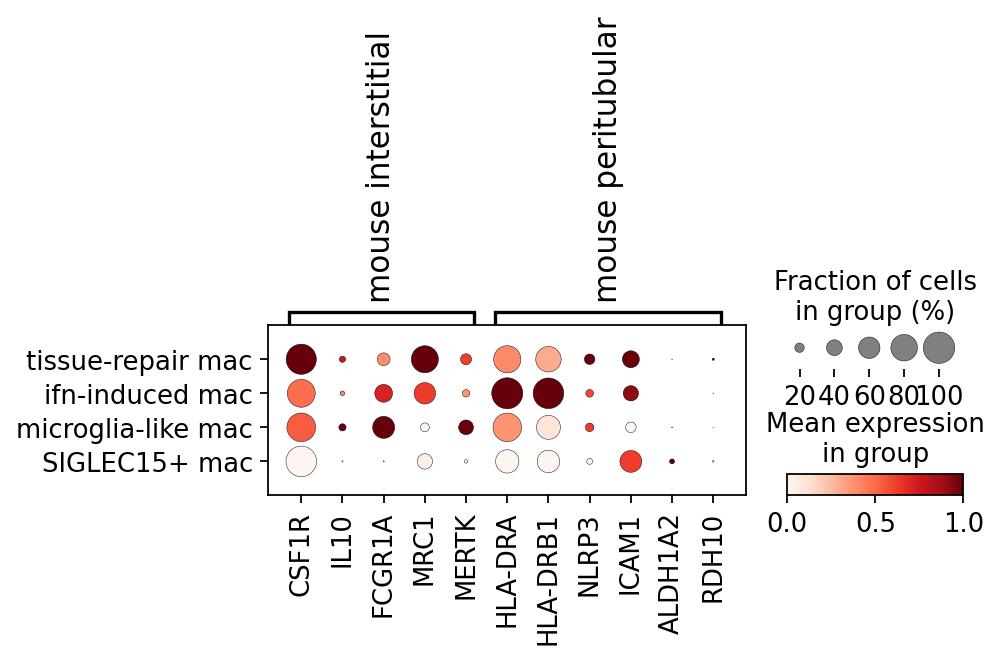

In [190]:
sc.pl.dotplot(males[[i in ['tissue-repair mac', 'ifn-induced mac', 'microglia-like mac', 'SIGLEC15+ mac'] for i in males.obs['clusters']]],
              var_names = ['CSF1R', 'IL10', 'FCGR1A', 'MRC1', 'MERTK', 'HLA-DRA', 'HLA-DRB1', 'NLRP3', 'ICAM1', 
                           'ALDH1A2', 'RDH10'], 
              groupby = 'clusters',  standard_scale = 'var', save = '_mouse_markers.pdf',
             swap_axes= False, var_group_positions = [(0,4), (5,10)], var_group_labels = ['mouse interstitial', 
                                                            'mouse peritubular', 'new from Roser'])

In [68]:
cytokines = ['GDNF', 'EGF', 'TGFB1', 'TGFB2','TGFB3','FGF2']

### CellphoneDB plots

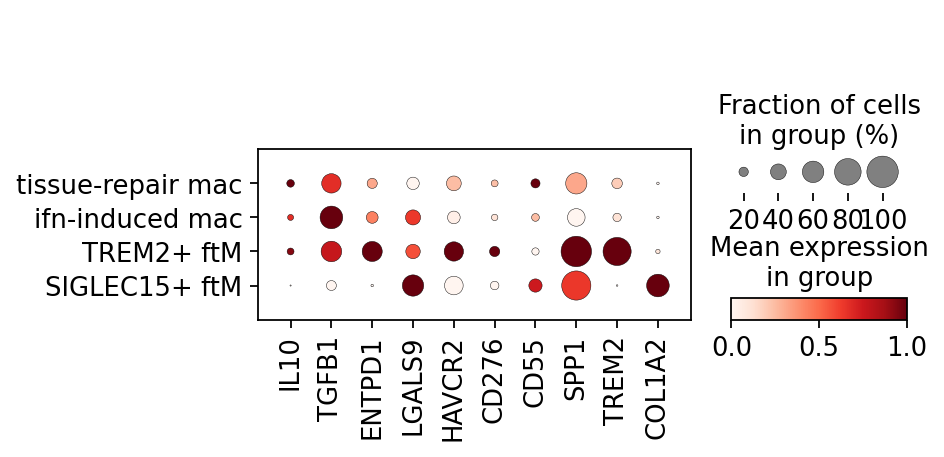

In [14]:
sc.pl.dotplot(adata[[i in ['tissue-repair mac', 'ifn-induced mac', 'TREM2+ ftM', 'SIGLEC15+ ftM'] for i in adata.obs['clusters']]],
              var_names = ['IL10', 'TGFB1', 'ENTPD1', 'LGALS9', 'HAVCR2', 'CD276', 'CD55','SPP1', 
                           'TREM2', 'COL1A2',], 
              groupby = 'clusters',  save = '_markers_interactions.pdf',
              categories_order = ['tissue-repair mac', 'ifn-induced mac', 'TREM2+ ftM', 'SIGLEC15+ ftM'],
    standard_scale = 'var') # ,

#### End of notebook 